# Desafio Codenation

Descubra as melhores notas de matemática do ENEM 2016.

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:
- Matemática: 3
- Ciências da natureza: 2
- Linguagens e códigos: 1.5
- Ciências humanas: 1
- Redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.

# Importando dados

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
np.random.seed(seed=1) # Reprodutibilidade
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/"

df_test = pd.read_csv(path + "test.csv", sep=",", encoding="UTF8")
df_train = pd.read_csv(path + "train.csv", sep=",", index_col=0, encoding="UTF8")

# Análise exploratória

In [4]:
print("Nº. de registros de teste:", len(df_test))
print("Nº. de registros de treino:", len(df_train))

Nº. de registros de teste: 4576
Nº. de registros de treino: 13730


In [5]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [6]:
df_test.sample(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
2838,586e7064860818014147f486a6a1588301e6a3bf,35,SP,22,M,2,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,473.5,560.2,598.9,0,1.0,120.0,80.0,100.0,120.0,20.0,440.0,H,A,D,B,A,C,B,A
1520,6aba74ebcbbdb7b9f2a4483adeb769de06403004,23,CE,18,M,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,442.8,511.8,552.0,1,1.0,120.0,100.0,100.0,120.0,40.0,480.0,B,B,B,A,A,A,NaN,A
3335,838587789b676622d28f4397ef165c2e1b18fd5a,33,RJ,30,M,1,1,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,B,A,A,B,NaN,A
3807,4e52b73e91be41ec437fe105497c6fa4b2d9c2bb,27,AL,17,M,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,435.4,418.9,440.5,0,1.0,80.0,120.0,80.0,100.0,60.0,440.0,C,C,B,A,A,A,NaN,A
3635,dee4340768896265cc860b2143a197f1e83857dc,23,CE,19,M,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,500.9,532.6,422.1,1,1.0,120.0,120.0,100.0,120.0,80.0,540.0,D,D,C,A,A,A,NaN,A


In [7]:
df_train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

In [8]:
df_train.sample(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
737,bd51b819794863a0e3970a451241afedd7b561e3,2016,2912400,Ibipeba,29,BA,17,F,0.0,3,1,2912400.0,Ibipeba,29.0,BA,2,0,2,1.0,0,29062519.0,2912400.0,Ibipeba,29.0,BA,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,C,B,C,5.0,2.0,5.0,5.0,2.0,5,5,5,5,5,5,5,5.0,A,A,A,A,B,A,A,A,A
1968,1b60cf41472ffb4566ad0499cefe42a5964f0350,2016,3303906,Petrópolis,33,RJ,24,F,1.0,3,1,3303906.0,Petrópolis,33.0,RJ,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,B,B,C,A,A,B,B,E,D,3.0,3.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,B,A
1810,de57c76d613f633f2c6941461db7791490625c23,2016,5300108,Brasília,53,DF,28,F,1.0,3,1,2102101.0,Brejo,21.0,MA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,C,F,D,5.0,5.0,5.0,5.0,0.0,5,5,5,5,5,5,5,5.0,A,D,A,A,A,A,A,A,A
3118,fde0cb4febd850be548f20e1067c273601a9dd64,2016,1721000,Palmas,17,TO,22,M,0.0,2,1,1721000.0,Palmas,17.0,TO,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,B,B,A,A,A,B,B,A
735,17769c96b5d25bc0f7560a7ef0b4cf233605deb4,2016,1504208,Marabá,15,PA,18,F,0.0,3,1,1504208.0,Marabá,15.0,PA,2,0,2,1.0,0,15127729.0,1504208.0,Marabá,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,B,B,B,A,A,A,A,A,B,B,B,E,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,3,4,5,NaN,A,A,A,A,B,A,A,A,A


In [9]:
df_train.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.0,...,13730.0,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000,6355.000000,6355.000000,6354.000000,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,0.002185,0.000146,0.000947,0.000073,0.000073,0.0,0.000437,0.000510,0.009687,0.000947,0.001602,0.000146,0.0,0.004151,0.0,...,0.0,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,4.083467,3.833360,2.608812,4.375984,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,0.046695,0.012069,0.030757,0.008534,0.008534,0.0,0.020901,0.022575,0.097947,0.030757,0.039998,0.012069,0.0,0.064301,0.0,...,0.0,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,1.603004,1.661301,2.234009,1.210998,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0

Analisando as distribuições das notas na base de treino.

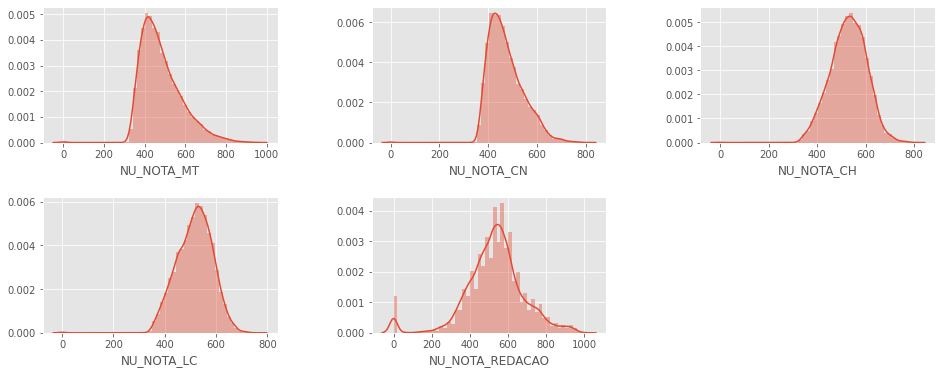

In [10]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.distplot(df_train["NU_NOTA_MT"]);

ax = fig.add_subplot(2, 3, 2)
sns.distplot(df_train["NU_NOTA_CN"]);

ax = fig.add_subplot(2, 3, 3)
sns.distplot(df_train["NU_NOTA_CH"]);

ax = fig.add_subplot(2, 3, 4)
sns.distplot(df_train["NU_NOTA_LC"]);

ax = fig.add_subplot(2, 3, 5)
sns.distplot(df_train["NU_NOTA_REDACAO"]);

plt.show()

Analisando as distribuições das notas na base de teste.

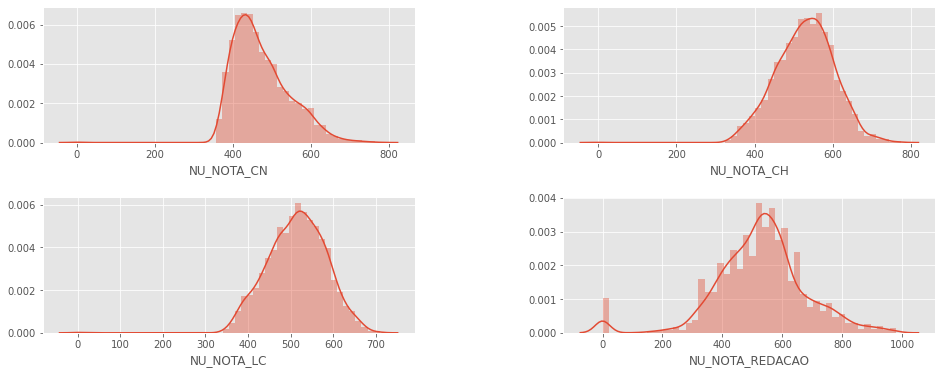

In [11]:
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.distplot(df_test["NU_NOTA_CN"]);

ax = fig.add_subplot(2, 2, 2)
sns.distplot(df_test["NU_NOTA_CH"]);

ax = fig.add_subplot(2, 2, 3)
sns.distplot(df_test["NU_NOTA_LC"]);

ax = fig.add_subplot(2, 2, 4)
sns.distplot(df_test["NU_NOTA_REDACAO"]);

plt.show()

# Pré-Processamento

Selecionando somente registros com notas contendo valores não nulos.

In [0]:
df_train = df_train.loc[
      (df_train["NU_NOTA_MT"].notnull()) & (df_train["NU_NOTA_MT"] != 0) 
    & (df_train["NU_NOTA_CN"].notnull()) & (df_train["NU_NOTA_CN"] != 0) 
    & (df_train["NU_NOTA_CH"].notnull()) & (df_train["NU_NOTA_CH"] != 0) 
    & (df_train["NU_NOTA_LC"].notnull()) & (df_train["NU_NOTA_LC"] != 0)
    & (df_train["NU_NOTA_REDACAO"].notnull()) & (df_train["NU_NOTA_REDACAO"] != 0)    
]

In [0]:
df_test = df_test.loc[
      (df_test["NU_NOTA_CN"].notnull()) & (df_test["NU_NOTA_CN"] != 0) 
    & (df_test["NU_NOTA_CH"].notnull()) & (df_test["NU_NOTA_CH"] != 0) 
    & (df_test["NU_NOTA_LC"].notnull()) & (df_test["NU_NOTA_LC"] != 0)
    & (df_test["NU_NOTA_REDACAO"].notnull()) & (df_test["NU_NOTA_REDACAO"] != 0)    
]

Verificando a quantidade de valores ausentes.

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
CO_UF_ENTIDADE_CERTIFICACAO,8895,0.903046
NO_ENTIDADE_CERTIFICACAO,8895,0.903046
SG_UF_ENTIDADE_CERTIFICACAO,8895,0.903046
Q041,8031,0.815330
CO_ESCOLA,6304,0.640000
TP_SIT_FUNC_ESC,6304,0.640000
TP_LOCALIZACAO_ESC,6304,0.640000
TP_DEPENDENCIA_ADM_ESC,6304,0.640000
SG_UF_ESC,6304,0.640000
CO_UF_ESC,6304,0.640000


Removendo colunas com pelo menos um valor nulo.

In [15]:
df_train = df_train.drop((missing_data[missing_data["Total"] > 0]).index, 1)
df_train.isnull().sum().max() # Checando

0

Analisando a correlação entre as *features* de notas.

In [0]:
features = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
            "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4",
            "NU_NOTA_COMP5"]

features_corr = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO",
    "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]

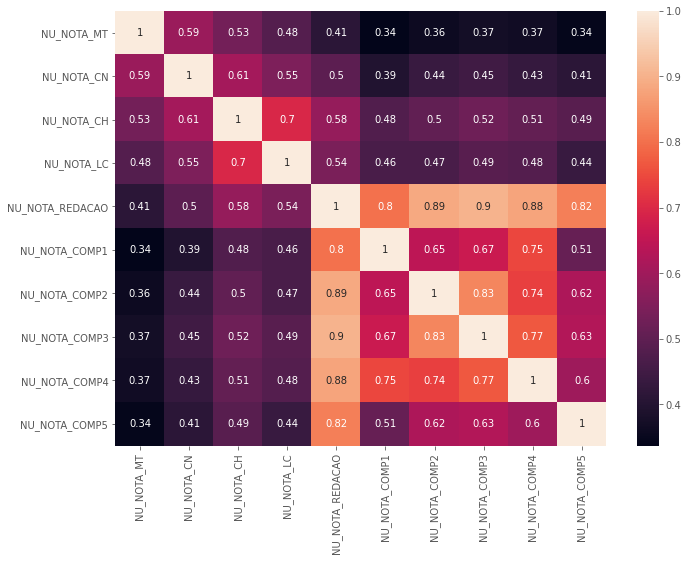

In [17]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

# Treinamento

Criando os vetores de treinamento e teste, bem como separando o *target* da regressão.

In [0]:
y_train = df_train["NU_NOTA_MT"]
X_train = df_train[features]

X_test = df_test[features]

Aplicando normalização nos dados.

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

Treinando o modelo de regressão.

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(criterion="mae", max_depth=8, max_leaf_nodes=None,
           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators= 500, n_jobs=-1,
           random_state=0, verbose=0, warm_start=False
)

regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Teste

Realizando predições e validando o modelo utilizando a base de treino.

In [0]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [24]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train).round(8))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train).round(8))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.21511432
MSE: 4637.68323552
RMSE: 68.1005377


Comparando os resultados com o desempenho obtido utilizando LinearRegression.

In [25]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  
linear_regressor.fit(x_train, y_train)

y_pred_test_lin = linear_regressor.predict(x_test)
y_pred_train_lin = linear_regressor.predict(x_train)

print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train_lin).round(8))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train_lin).round(8))  
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lin)).round(8))

MAE: 60.87492456
MSE: 5829.41765963
RMSE: 76.35062318


# Exportando resultados

In [0]:
df_answer = pd.DataFrame(zip(df_test["NU_INSCRICAO"], y_pred_test.round(1)), columns=["NU_INSCRICAO", "NU_NOTA_MT"])
df_answer.to_csv("answer.csv", index=False)